In [7]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pd.read_csv(path+'data/processed.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [9]:
winners = merged.query('podium == 1 & season < 2022')

In [10]:
winners.driver.value_counts().count()

11

[]

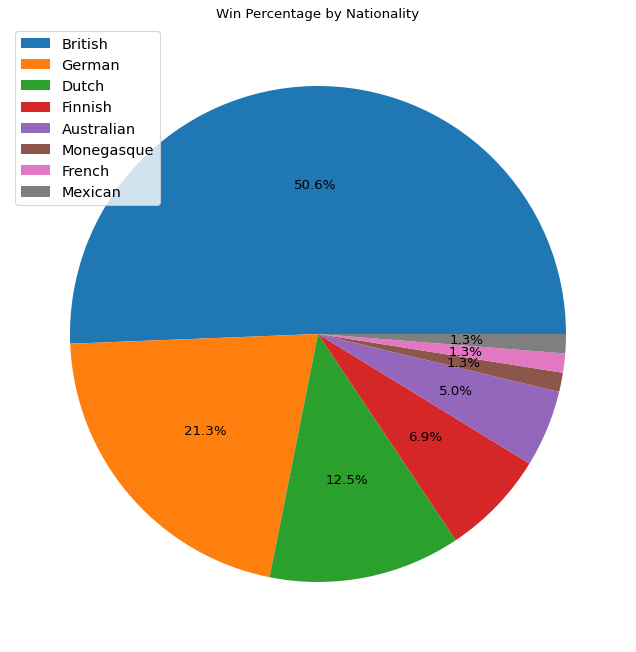

In [11]:
nationalities = winners.nationality.value_counts()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Win Percentage by Nationality')
axs.pie(nationalities.values, autopct='%1.1f%%', textprops={'fontsize': 12})
axs.legend(nationalities.index, loc=2, prop={'size': 13})
plt.plot()

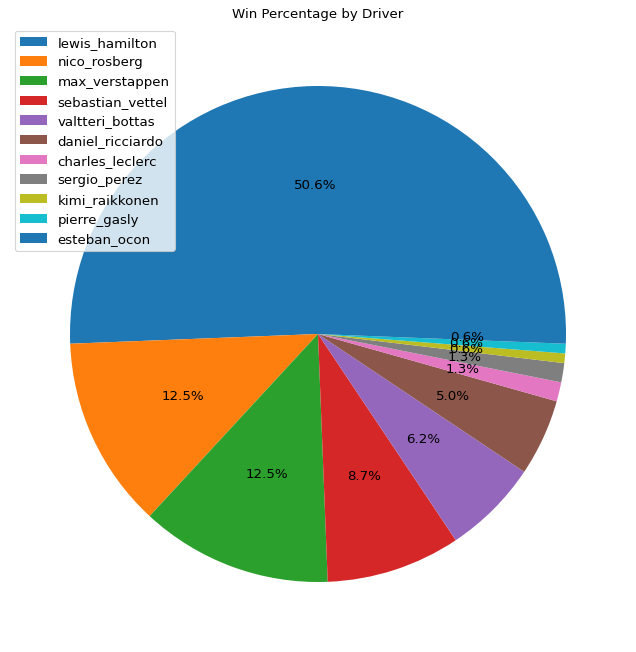

In [12]:
drivers = winners.driver.value_counts()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Win Percentage by Driver')
axs.pie(drivers.values,autopct='%1.1f%%', textprops={'fontsize': 12})
axs.legend(drivers.index, loc=2, prop={'size': 12})
plt.show()

In [13]:
points = data.query('season < 2022').groupby('driver').agg({'driver_points_from': sum}).sort_values('driver_points_from', ascending=False).reset_index()
points

,driver,driver_points_from
0,lewis_hamilton,2961.0
1,valtteri_bottas,1652.0
2,sebastian_vettel,1602.0
3,max_verstappen,1532.0
4,daniel_ricciardo,1183.0
5,nico_rosberg,1024.0
6,kimi_raikkonen,902.0
7,sergio_perez,728.0
8,charles_leclerc,520.0
9,carlos_sainz,511.0


In [16]:
points.query('driver_points_from != 0').driver.count()

37

In [53]:
total_points = points.driver_points_from.sum()
N = 15
top_N_points = points[:N]
sum_N_points = top_N_points.driver_points_from.sum()
other_points = total_points - sum_N_points
top_points = top_N_points.append({'driver': 'other', 'driver_points_from': other_points}, ignore_index=True)


/var/folders/yr/_c96mt814gvfyzflkx16n3xw0000gn/T/ipykernel_93132/2886438354.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_points = top_N_points.append({'driver': 'other', 'driver_points_from': other_points}, ignore_index=True)


[]

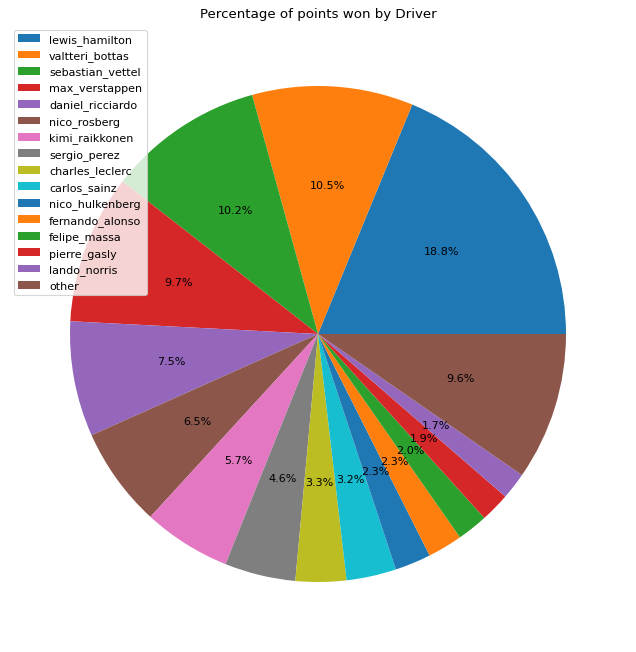

In [54]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Percentage of points won by Driver')
axs.pie(top_points.driver_points_from,autopct='%1.1f%%')
axs.legend(top_points.driver, loc=2, prop={'size': 10})
plt.plot()

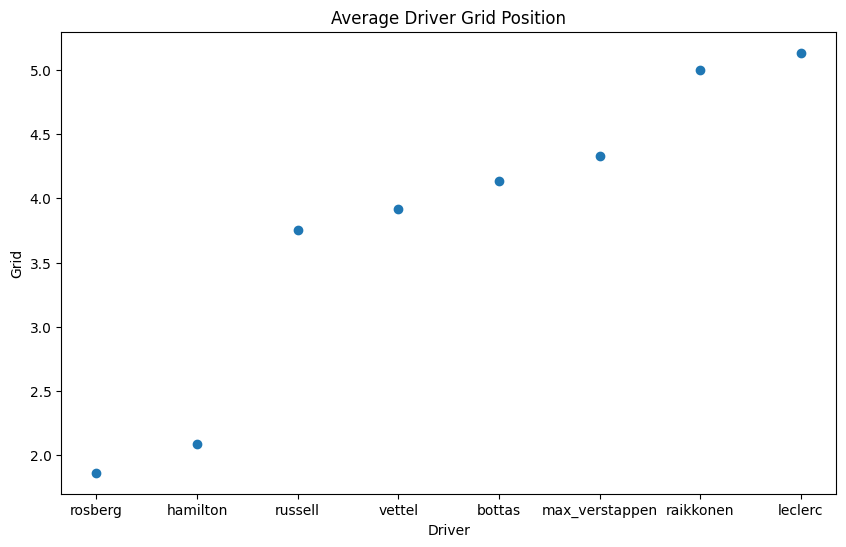

In [6]:
avg_driver_grid = merged.groupby(
    'driver'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

driver_values = avg_driver_grid[:8]

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Driver Grid Position')
axs.set_xlabel('Driver')
axs.set_ylabel('Grid')
axs.scatter(driver_values.driver, driver_values.grid)
plt.show()

In [62]:
merged.query('season == 2014 & round == 1')

,season,round,circuit_id,country,lat,long,date,driver,date_of_birth,nationality,...,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,pos,final_time,q_delta,q1,q2,q3
0,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,rosberg,1985-06-27,German,...,1,25,1,2,3,104.595,0.364,92.564,102.264,104.595
1,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,kevin_magnussen,1992-10-05,Danish,...,2,33,0,1,4,105.745,1.514,90.949,103.247,105.745
2,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,alonso,1981-07-29,Spanish,...,4,18,0,3,5,105.819,1.588,91.388,102.805,105.819
3,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,bottas,1989-08-28,Finnish,...,5,10,0,4,10,108.147,3.916,91.601,103.852,108.147
4,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,hulkenberg,1987-08-19,German,...,6,9,0,5,7,106.030,1.799,93.893,103.658,106.03
5,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,vergne,1990-04-25,French,...,8,6,0,6,6,105.864,1.633,93.488,103.849,105.864
6,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,kvyat,1994-04-26,Russian,...,9,6,0,6,8,107.368,3.137,93.777,104.331,107.368
7,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,hamilton,1985-01-07,British,...,19,25,1,2,1,104.231,0.000,91.699,102.890,104.231
8,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,massa,1981-04-25,Brazilian,...,20,10,0,4,9,108.079,3.848,91.228,104.242,108.079
9,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16,ricciardo,1989-07-01,Australian,...,22,0,0,11,2,104.548,0.317,90.775,102.295,104.548


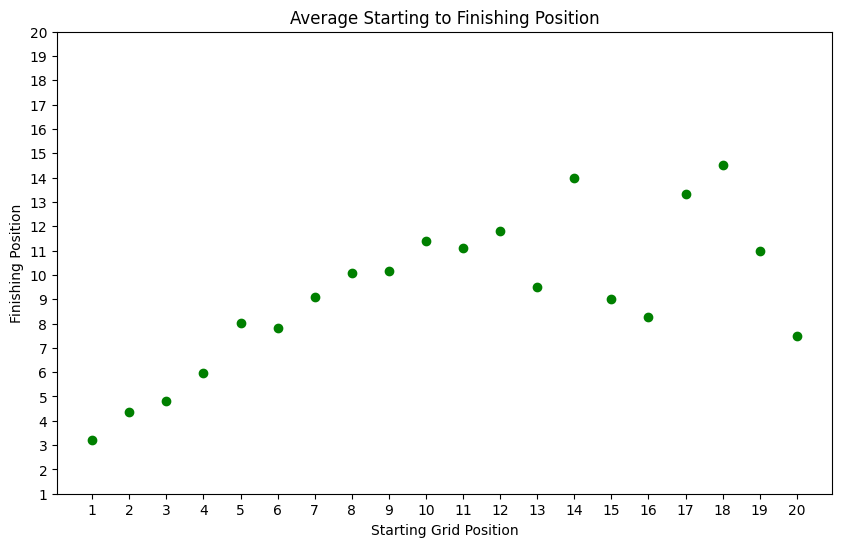

In [57]:
group_by_grid = merged.groupby(
    'grid'
    ).agg({
        'podium': mean
    }
).reset_index().sort_values('grid')

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Starting to Finishing Position')
axs.set_xlabel('Starting Grid Position')
axs.set_xticks(list(range(1,21)))
axs.set_yticks(list(range(1,21)))
axs.set_ylim([1,20])
axs.set_ylabel('Finishing Position')
axs.scatter(group_by_grid.grid, group_by_grid.podium, color='g')
plt.show()

/var/folders/77/g3_0sy3x3y5_z5nv9dmdby380000gn/T/ipykernel_29253/466215630.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean()['podium']


<AxesSubplot: xlabel='grid'>

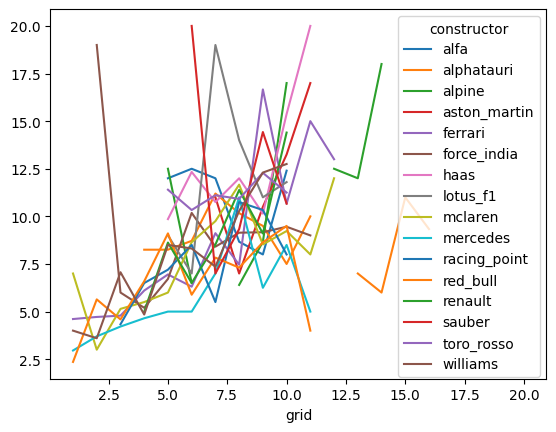

In [55]:
group_constructor_by_grid = merged.groupby(
    ['grid',
    'constructor']
    ).mean()['podium']

group_constructor_by_grid.unstack().plot()